# Hotel Recommendation

Recommendation of Hotels from Hotel reviews dataset available at below site:
https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe/data

Brief Overview of the dataset:

515000 rows of customer reviews with other features.
17 columns in the dataset are: Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Reviewer_Score,Total_Number_of_Reviews_Reviewer_Has_Given,Total_Number_of_Reviews,Tags,days_since_review,Additional_Number_of_Scoring,lat,lng.

We start with the data exploration,

## 1. Acquire Data

In [0]:
import numpy as np               # Python library for numerical computation (perform operations on arrays and matrices)
import pandas as pd              # Python library for easy to use data structures
import scipy as sp               # Python library for numerical algorithms
from matplotlib import pyplot    # Python library for plotting data
import seaborn as sns            # Python library based on matplotlib 
import missingno as msno         # Python library to detect missing numbers (pip install missingno)

In [0]:
df = pd.read_csv("filepath")

## 2. Data Exploration
- General exploring
- Statistical analysis
- Issues

### 2.1 Analysis of both numerical and categorical values

In [0]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

#### 2.1.1 Numerical observations
- Average_Score is the mean of Reviewer_Score which is nice to know
- We can see that the counts are lower for lat/lng which means we have missing values

In [0]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


#### 2.1.2 Categorical observations
- Hotel_name Britannia has the highest frequency of reviews: 4789
- August 2nd 2017 has the highest frequency of reviews: 2583 which tells us 2017 and Aug is a popular year/month
- 1/2 of the reviewers come from the UK
- 24% of all reviews have no negative reviews (126902/511944)*100
- 7% of all reviews have no positive reviews (35,695/511944)*100.

NOTE: We could have used df.column_name.describe() frequency information but we found it easier to do it all in one shot as below:

In [0]:
df.describe(include='all')

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
count,511944,511944.000000,511944,511944.000000,511944,511944,511944,511944.000000,511944.000000,511944,511944.000000,511944.000000,511944.000000,511944,511944,511944.000000,511944.000000
unique,1476,NaN,731,NaN,1475,227,327927,NaN,NaN,409941,NaN,NaN,NaN,54934,731,NaN,NaN
top,163 Marsh Wall Docklands Tower Hamlets London ...,NaN,8/2/2017,NaN,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,NaN,NaN,No Positive,NaN,NaN,NaN,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days,NaN,NaN
freq,4789,NaN,2583,NaN,4789,244321,126902,NaN,NaN,35695,NaN,NaN,NaN,5100,2583,NaN,NaN
mean,NaN,500.456802,NaN,8.398216,NaN,NaN,NaN,18.543247,2748.469807,NaN,17.766849,7.151145,8.396053,NaN,NaN,49.443040,2.824222
std,NaN,501.549523,NaN,0.549038,NaN,NaN,NaN,29.696878,2323.330791,NaN,21.789369,11.028050,1.637778,NaN,NaN,3.468029,4.581637
min,NaN,1.000000,NaN,5.200000,NaN,NaN,NaN,0.000000,43.000000,NaN,0.000000,1.000000,2.500000,NaN,NaN,41.328376,-0.369758
25%,NaN,169.000000,NaN,8.100000,NaN,NaN,NaN,2.000000,1161.000000,NaN,5.000000,1.000000,7.500000,NaN,NaN,48.214277,-0.143649
50%,NaN,343.000000,NaN,8.400000,NaN,NaN,NaN,9.000000,2134.000000,NaN,11.000000,3.000000,8.800000,NaN,NaN,51.499981,-0.000250
75%,NaN,666.000000,NaN,8.800000,NaN,NaN,NaN,23.000000,3633.000000,NaN,22.000000,8.000000,9.600000,NaN,NaN,51.516288,4.834443


### 2.2 Check for duplicate values
Below result shows that we have 526 duplicate values

In [0]:
print(sum(df.duplicated()))

526


### 2.3 Check for missing values
Below result shows that we have missing values in lat/lng columns.
We also knew this from analyzing the statistics

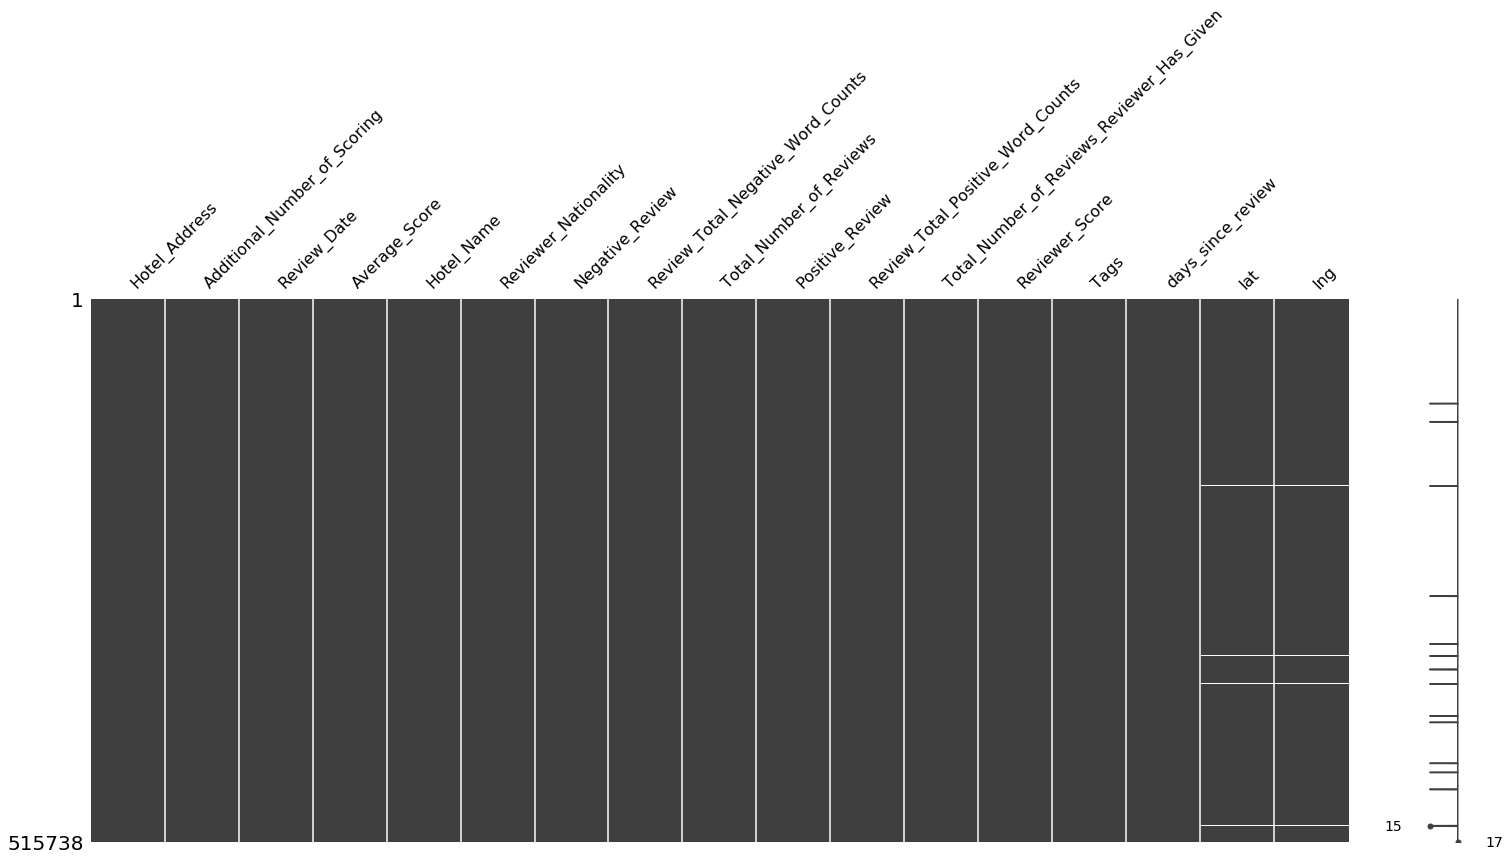

In [0]:
msno.matrix(df)

Summary of findings:
- 1492 unique hotels
- Reviewers from 227 countries
- Average hotel rating is the same as the average of review rating (Now we know how average rating is calculated)
- Average hotel rating high (avg 8.4 vs max 9.8) --> concludes only luxury hotels


Issues:
- We have 526 duplicate values
- Lat/lng has missing rows (total of 3268)
- We have doubts about correctness of the columns that represent the count of negative and positive words


## 3. Data Cleaning

### 3.1 Drop Duplicates
We will now drop the 526 duplicates and verify that they got dropped

In [0]:
df = df.drop_duplicates()

In [0]:
print(sum(df.duplicated()))

0


### 3.2 Drop missing values
We drop the missing values and then do a describe to check that our dataset was reduced from 
    Total: 515738 - dups 536 - na 3268 = 511944.

In [0]:
df = df.dropna()

In [0]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,511944.000000,511944.000000,511944.000000,511944.000000,511944.000000,511944.000000,511944.000000,511944.000000,511944.000000
mean,500.456802,8.398216,18.543247,2748.469807,17.766849,7.151145,8.396053,49.443040,2.824222
std,501.549523,0.549038,29.696878,2323.330791,21.789369,11.028050,1.637778,3.468029,4.581637
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214277,-0.143649
50%,343.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,-0.000250
75%,666.000000,8.800000,23.000000,3633.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


## 4. Data Visualization
- We did graphs that we think best describes the dataset.

### 4.1 Count of Reviewe score
Below graph shows count of hotels and the average score they received.
As you can see, most of the ratings are in the 8 rate range.
We liked this graph and validated it. Graph is credited to DatumX at Kaggle

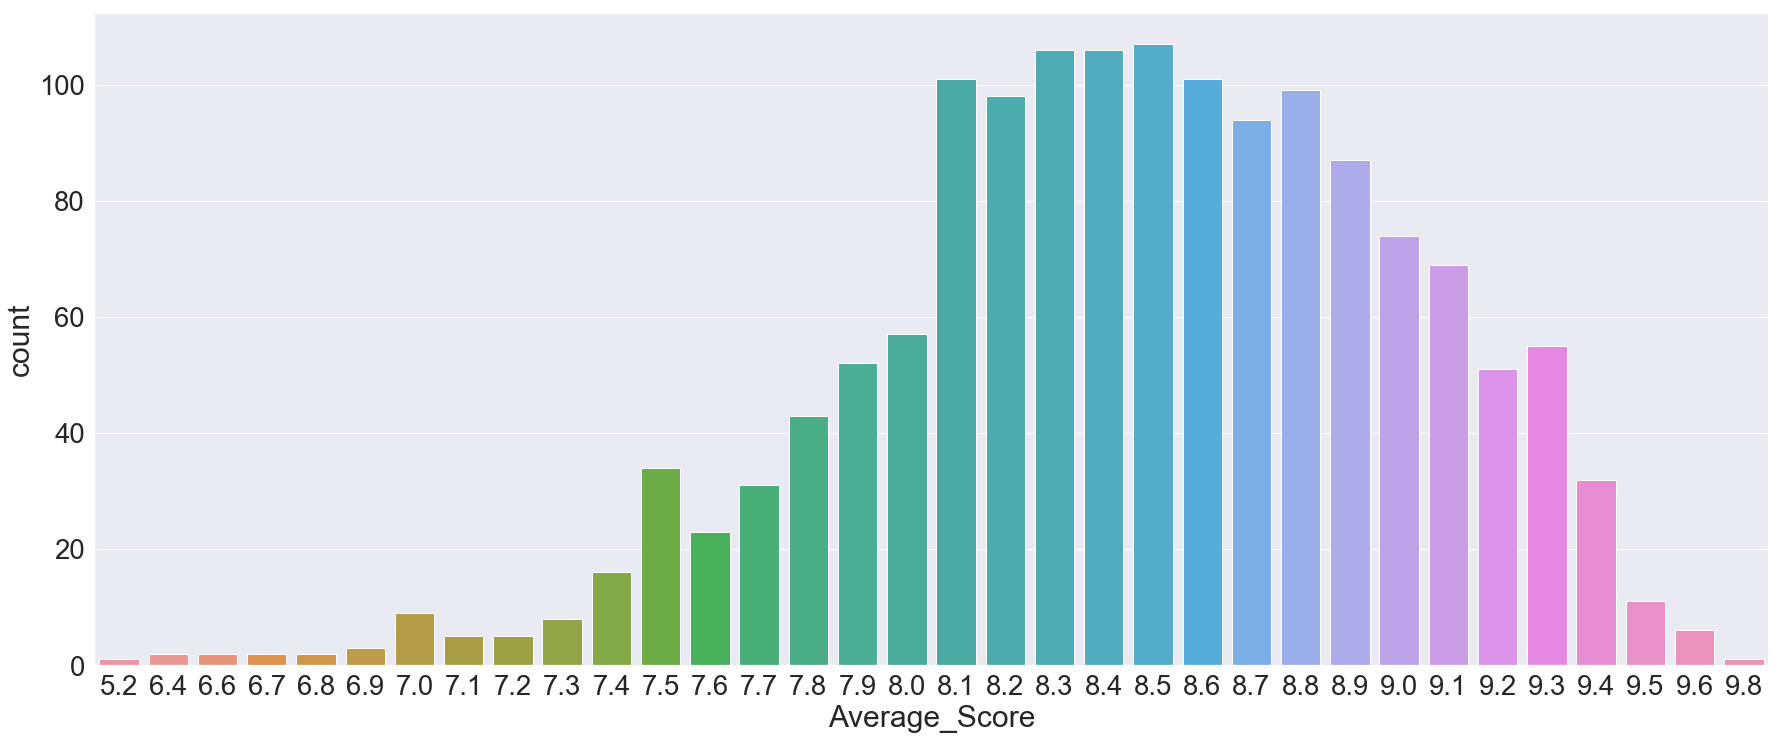

In [0]:
Review_plot = df[["Hotel_Name","Average_Score"]].drop_duplicates()
sns.set(font_scale = 2.5)
a4_dims = (30, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "Average_Score",data=Review_plot)

### 4.2 Top 10 most reviewed hotels

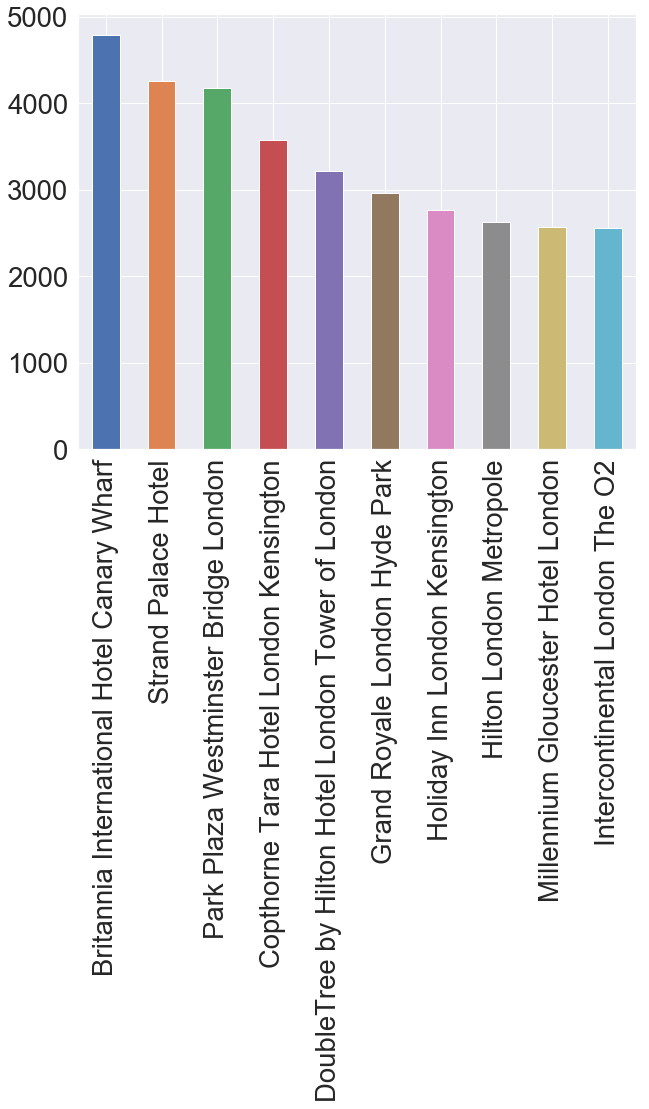

In [0]:
Hotel_counts = df.Hotel_Name.value_counts()
Hotel_counts[:10].plot(kind='bar',figsize=(10,8))

### 4.3 Top 20 Review Dates

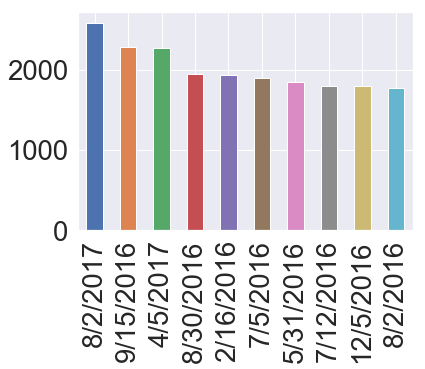

In [0]:
Review_Date_count = df.Review_Date.value_counts()
Review_Date_count[:10].plot(kind='bar')

# 5 Algorithms

## 5.1 Approach 1
Recommending hotel on just ratings and other offering based filtering hides the fact that real experiences are shared in reviews and not numbers,they are just judgemental approximators.In this approach we start to investigate what users really care about in a Hotel and that could be found in their reviews.Extracting all unigrams and bigrams gave us opportunity to look into what users talk most about in the reviews.Unigrams also brings about lot of trivial words and hence manual inspection helped us bank on bigrams for uniform topics identification.Using text pre processing like removing stopwords and lemmatising helped reduce a lot of insignificant and too common words.Using tf-idf,all the bigrams were extracted along with its respective tf-idf scores.Top 10 bigrams were selected to give user preferences for searching Hotel like great location,good breakfast etc. which is quite dynamic and intuitive compared to currently offered filtering preferences.

Now,for each hotel its top bigrams are extracted along with its respective weights.In order to give prompt response to user, we compute all the above bigrams offline and store in file.We refine top hotels as per bigram weights and for each hotel we pull ten hotels which can be kept in database for quick retrival.So whenever user gives preference or set of preference weights are added and hotels with top sums are returned.

Library used for Text Pre processing:NLTK
Library used for context understanding and similarity computation:Spacy

In [0]:
import pandas as pd
import numpy as np
import re, nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
nltk.download('punkt')
wordnet_lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('wordnet')
import numpy as np
import sklearn.feature_extraction.text as text
!pip install -U spacy
import spacy
!python -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg')

Extracting 10 bigrams from all the reviews using tfidf.

In [0]:
df = pd.read_csv('/content/gdrive/Team Drives/CMPE256/Project/Hotel_Reviews.csv') #read file
df_positive = df[['Hotel_Name','Positive_Review']]   #create new df containg only positive reviews and hotel names
work=df_positive.iloc[:,1]   #create separate df for positive reviews
pos = []    #list for tokenised words
for i in work:
    letters = re.sub('[^a-zA-Z]',' ',i)  #keeping only alphabets in reviews
    tokens = nltk.word_tokenize(letters)  #breaking sentences into tokens
    lowercase = [l.lower() for l in tokens] #lower casing all the letters in reviews
    filtered_result = list(filter(lambda l: l not in stop_words, lowercase))  #removing stopwords like the
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]  #lemmatise words like doing>>do
    pos.append(' '.join(lemmas))  #append all the words to list
    
def get_imp(bow,mf,ngram):
    tfidf=text.CountVectorizer(bow,ngram_range=(ngram,ngram),max_features=mf,stop_words='english') #converting text to sparse matrix
    matrix=tfidf.fit_transform(bow) #tfidf 
    return pd.Series(np.array(matrix.sum(axis=0))[0],index=tfidf.get_feature_names()).sort_values(ascending=False) #list of bigrams with tfidf scores

total_data_bigram_main=get_imp(pos,mf=10,ngram=2)

For each Hotel extracting top bigrams from its respective reviews,

In [0]:
grouped = df.groupby('Hotel_Name')  #group Hotel to extract hotel names
k=list(grouped.groups.keys())       #transfer all the hotel names in a list
with open("demofile.txt", "w") as fp: #create a file to store top bigrams of a hotel
  for co in range(len(k)):   
    df_h1 = df.loc[df['Hotel_Name']==k[co]]  #create df to store reviews of hotel only
    df_positive_h1 = df_h1[['Hotel_Name','Positive_Review']]  #create df to store hotel name and positive reviews only
    work_h1=df_positive_h1.iloc[:,1]  #keep only positive reviews 
    pos_h1 = []
    for i in work_h1:
      letters = re.sub('[^a-zA-Z]',' ',i)   #pre process reviews
      tokens = nltk.word_tokenize(letters)
      lowercase = [l.lower() for l in tokens]
      filtered_result = list(filter(lambda l: l not in stop_words, lowercase))
      #print(filtered_result)
      lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] 
      pos_h1.append(' '.join(lemmas))
      
      
    def get_imp(bow,mf,ngram):  #create bigrams using tfidf
      tfidf=text.CountVectorizer(bow,ngram_range=(ngram,ngram),max_features=mf,stop_words='english')
      matrix=tfidf.fit_transform(bow)
      return pd.Series(np.array(matrix.sum(axis=0))[0],index=tfidf.get_feature_names()).sort_values(ascending=False)
    
    
    total_data_bigram=get_imp(pos_h1,mf=50,ngram=2) # extracting 50 bigrams for more diversity
    w = list(total_data_bigram)  #create a list saving bigram scores
    a=list(total_data_bigram.index.values)  # create a list saving bigrams
    #Algorithm to remove contextually similar bigrams and increase proportionally weight of corresponding bigram 
    for i in range(total_data_bigram.shape[0]):    
      if total_data_bigram.index[i] in a:
  
        total = 0
        x = nlp(total_data_bigram.index[i])    #spacy function for similarity computation(nlp)
        ix = a.index(total_data_bigram.index[i])
        total = total+w[ix]
        for j in range(i+1, total_data_bigram.shape[0]):
          y = nlp(total_data_bigram.index[j])

          if (x.similarity(y)>0.8) & (total_data_bigram.index[j] in a):  #similarty threshold is 0.8
            total = total + total_data_bigram[j]   #adding weight
            p=a.index(total_data_bigram.index[j])
        
            del a[p]   #removing bigram
            del w[p]   #removing corresponding weight
      
        w[ix]=total     #increasing propositionally weight of original corresponding bigram
    a = a[:10]
    w = w[:10]
    ans=list(zip(a,w))    #creating tuple for printing
    
    for x in ans:
       fp.write(k[co]+","+x[0]+","+str(x[1])+"\r\n")
    

Having extracted 10 bigrams for each Hotel offline,all the data is transfered to MongoDB

In [0]:
# Get information from all hotels grouped by Hotel_Name that we will use in our Recommender system to evaluate
s_sum = df.groupby(['Hotel_Name', 'Average_Score', 'Total_Number_of_Reviews', 'Hotel_Address', 'lat', 'lng'])['Hotel_Name'].count()

In [0]:
# Export series to CSV   MP Note: Didn't come with columns so had to add them in the csv afterwards
s_sum.to_csv("C:/Users/maria/OneDrive/256/Project/Hotel_sum.csv", sep=',')

In [0]:
# Import as a dataframe
df_sum = pd.read_csv("C:/Users/maria/OneDrive/256/Project/Hotel_sum.csv")

In [0]:
#Load result from positive review extraction
df_cat = pd.read_csv("C:/Users/maria/OneDrive/256/Project/Hotel_cat.csv")

In [0]:
#Merge the 2 files
combined = pd.merge(df_cat,
                 df_sum[['Hotel_Name', 'Average_Score', 'Total_Number_of_Reviews', 'Hotel_Address', 'Lat', 'Lng']],
                 on='Hotel_Name')

In [0]:
#Output to CSV so can be loaded into Mongo database
combined.to_csv("C:/Users/maria/OneDrive/256/Project/Combined.csv", sep=',')

In [0]:
# Use https://www.csvjson.com/csv2json to convert combined.csv to json
# Then upload the json file to Mongo db

Strategy to recommend Hotels is by adding weights as per preference given by the user and selecting top 5 sums(Hotel)-this code is written in node.js

## **Evaluation of Approach-1**

In [0]:
import scipy as sp

pred_1 = [2, 1, 2, 3, 3]
ground_truth_1 = [1, 2, 3, 4, 5]

pred_2 = [2, 1, 2, 4, 3]
ground_truth_2 = [1, 2, 3, 4, 5]

pred_3 = [2, 1, 5, 4, 3]
ground_truth_3 = [1, 2, 3, 4, 5]

pred_4 = [2, 1, 2, 3, 4]
ground_truth_4 = [1, 2, 3, 4, 5]

tau1,p = sp.stats.kendalltau(pred_1, ground_truth_1)
tau2,p = sp.stats.kendalltau(pred_2, ground_truth_2)
tau3,p = sp.stats.kendalltau(pred_3, ground_truth_3)
tau4,p = sp.stats.kendalltau(pred_4, ground_truth_4)

tau=tau1+tau2+tau3+tau4
tau=tau/4

rho1,p = sp.stats.spearmanr(pred_1, ground_truth_1)
rho2,p = sp.stats.spearmanr(pred_2, ground_truth_2)
rho3,p = sp.stats.spearmanr(pred_3, ground_truth_3)
rho4,p = sp.stats.spearmanr(pred_4, ground_truth_4)

rho=rho1+rho2+rho3+rho3
rho=rho/4

print('Average Kendall Coefficient is '+str(tau))
print('Average Spearman Coefficient is '+str(rho))

Average Kendall Coefficient is 0.5339328643293222
Average Spearman Coefficient is 0.6271885653754257


## 5.2 Approach 2 
We use content based collabarative filtering for rommending Hotels here.Using user inputs like location of trip,his nationality,trip type like leisure or business and number of travellers,we create user profile(as we have in dataset as features).Using input, we directly filter users and reduce data on which we can build regression model to predict rating of that user.Since dataset contains features which are mix of user details like nationality and hotel reviews related features,predciting rating on mix of features requires a different approach as entire row has predictors which cannot be asked from user.Linear Regression methods like Ridge performed well when applied on entire dataset's numerical features indicating good predictor qualities in those features.Hence for each Hotel we assumed first row as user and trained the regression model on the rest of the data of that Hotel.This approach helps predict rating as user selected is as good as random and similar to real user.Also we have rating of the assumed user which helps us evaluate how our model performs.Once ratings of all the Hotels are predicted,top 5 predicted ratings are pulled and corresponding Hotels are recommended.

Library for regression models used is SKLearn's linear model and ensemble model.

In [0]:
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import lasso_path, enet_path
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Dataset is loaded and filtered on user input.

In [0]:
df = pd.read_csv('/content/gdrive/Team Drives/CMPE256/Project/Hotel_Reviews.csv')
p =df[df['Hotel_Address'].str.contains('London')]  #pull only those rows which user gives input as location
#q =p[p['Reviewer_Nationality'].str.contains('United Kingdom')]  #pull only those rows which user gives input as his nationality
#r = q[q['Tags'].str.contains('Leisure trip')]  #pull only those rows which user gives input as his trip type
#a = r[r['Tags'].str.contains('Couple')]  #pull only those rows which user gives input as number of travellers along with him
grouped = p.groupby('Hotel_Name')  #group the remaining data as per Hotel
k = list(grouped.groups.keys())  #extract Hotel names inti list
p.drop(['Hotel_Address','Review_Date','Reviewer_Nationality','Negative_Review','Positive_Review','Tags','days_since_review','lat','lng'],axis=1,inplace=True)  #drop categorical data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Once dataset is reduced to similar users,for each hotel we keep one row as user(real user) and train the regression model on the rest.Once model is trained we predict rating for the hold-out row(real user).Rating for all the hotels are saved,sorted and 5 Hotels are pulled.

In [0]:
rating={} #dictionary to save hotel names as keys and predicted rating as values(created for sorting)
rat1={}
rat2={}
rat3={}
pred=[]  #list to save predicted rating
pred1=[]
pred2=[]
pred3=[]
actual=[]  #list to save
act1=[]
act2=[]
act3=[]
for i in range(len(k)):
  df_h = p.loc[p['Hotel_Name']==k[i]]
  X_test=df_h.iloc[:1,:]   #Hold-out one row assuming it is a real user row
  X_train=df_h.iloc[1:,:]  #create a new df for all other rows
  y=X_train['Reviewer_Score'] 
  test=X_test['Reviewer_Score'] #save rating for evaluation
  X_train.drop(['Hotel_Name','Reviewer_Score'],axis=1,inplace=True)#dropping categorical data and target data
  X_test.drop(['Hotel_Name','Reviewer_Score'],axis=1,inplace=True)
  X_Train=X_train.values   
  X_Train=np.asarray(X_Train)
  test=test.values
  test=np.asarray(test)
  X_Test=X_test.values
  X_Test=np.asarray(X_test)
  X_std=StandardScaler().fit_transform(X_Train) #standardising data
  X_std_test=StandardScaler().fit_transform(X_Test)
  clf=Ridge(alpha=1.0)  #applying Ridge regression model
  clf1=svm.SVR(kernel='rbf')
  clf2=svm.SVR(kernel='linear')
  clf3=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0, loss='ls')
  clf.fit(X_std,y)
  clf1.fit(X_std,y)
  clf2.fit(X_std,y)
  clf3.fit(X_std,y)
  y1_knn=clf.predict(X_std_test)#predict on the hold-out row
  y1_knn1=clf1.predict(X_std_test)
  y1_knn2=clf2.predict(X_std_test)
  y1_knn3=clf3.predict(X_std_test)
  rating[k[i]]=(y1_knn)
  rat1[k[i]]=(y1_knn1)
  rat2[k[i]]=(y1_knn2)
  rat3[k[i]]=(y1_knn3)
  pred.append((y1_knn))
  pred1.append((y1_knn1))
  pred2.append((y1_knn2))
  pred3.append((y1_knn3))
  actual.append(test)
  act1.append(test)
  act2.append(test)
  act3.append(test)
recomm = sorted(rating, key=rating.get, reverse=True) #sort all the rating
recomm[:5] #Recommend top 5 ratings and corresponding Hotels


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['41',
 '45 Park Lane Dorchester Collection',
 'The Soho Hotel',
 'Covent Garden Hotel',
 'Haymarket Hotel']

In [0]:
import math
rmse = math.sqrt(mean_squared_error(actual, pred))   #evaluating using mean square.
rmse1 = math.sqrt(mean_squared_error(act1, pred1)) 
rmse2 = math.sqrt(mean_squared_error(act2, pred2)) 
rmse3 = math.sqrt(mean_squared_error(act3, pred3)) 
print(rmse)
print(rmse1)
print(rmse2)
print(rmse3)

1.5888933625759774
1.6409893205681192
1.6553659212726284
1.6763619636303109


## **Evaluation of Approach - 2**

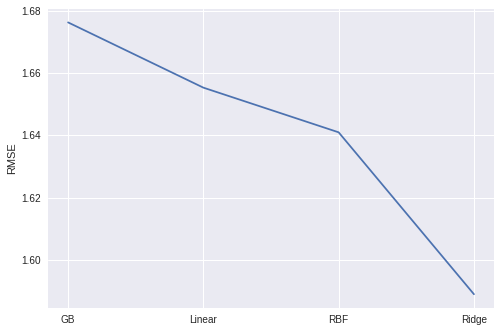

In [0]:
import matplotlib.pyplot as plt
plt.plot(['Ridge','RBF','Linear','GB'], [rmse, rmse1, rmse2, rmse3])
plt.ylabel('RMSE')
plt.show()